In [1]:
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Flujo 1
flujo1 = [ 60.76659012,  57.62647247,  50.41750336,  49.53574753,  48.33449936,
43.66425323,  41.04115295,  44.66896057,  50.56383896,  50.29148102,
48.44561386,  50.44940948,  51.58250809,  59.35596085,  77.53921509,
91.3781662 , 103.63374329, 123.92726898, 152.38206482, 170.97193909,
178.31158447 ,201.74856567, 216.82427979, 194.56236267, 156.55189514,
128.12651062  ,96.53326416,  70.87791443,  64.37514496,  64.37010193,
69.20238495,  74.72666168,  73.84421539,  70.54618073,  67.37627411,
70.02364349,  71.76290894,  70.48664093,  66.65513611,  62.97803116,
63.47818756 , 63.48593521,  63.65970612,  65.12601471,  61.96345139,
56.5904007  , 56.21949005]


In [3]:

#Flujo 2
flujo2 = [ 34.51300049,  35.04608917,  33.54432678,  37.79356384,  40.9273262,
38.60827255,  36.60696411,  39.29825211,  42.8025322,   41.11476135,
37.01183701,  38.25086212,  39.82696915,  45.49356461,  57.84592056,
63.74675751,  71.27405548,  90.15153503, 105.11828613, 124.74910736,
141.62988281, 139.71665955, 122.26168823, 108.24037933, 110.01968384,
99.83040619,  70.3952713,   55.88486481,  57.34952545,  56.50667191,
57.90737534,  60.49988937,  54.65034103,  43.25989914,  42.46909714,
48.96273041,  49.04454422,  48.71305084,  50.70087433,  50.2251091,
44.70508194,  40.60639191,  40.11267853,  43.38873672,  44.70631409,
37.76773453,  31.70433426]

 _________________________________

In [4]:
Y = flujo2
X = [6653 +i*.43 for i in range(0,len(Y))]# np.array(range(1,len(Y)+1))

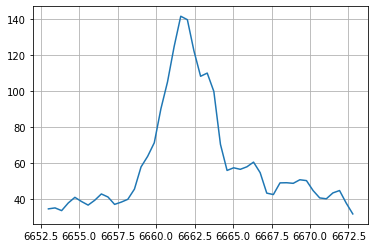

In [5]:
plt.plot(X,Y);
plt.grid()

In [39]:
# Condiciones iniciales

# [Amplitud, media, dispersión] + offset
N = 3

zerolev = np.mean(sorted(Y)[:3])
print(zerolev)
#print("Nivel cero:", zerolev)

Y = Y-zerolev

#p0 = [100, 30, 10,   # Gaussiana 1
#      100, 10, 10]  # Gaussiana 2


7.401486830834377e-17


In [40]:

def fit_gauss(x, p):
    A, mu, sigma = p
    return( A * np.exp(-(x-mu)*(x-mu)/(2.0*sigma*sigma)) )#+ zerolev )


def main_fitter(p,x,y,ngauss):
    chi2 = 0

    #zerol = p[-1]
    #p = p[:-1]
    
    model = np.zeros(np.array(y).shape)
    split_p = np.split(np.array(p),ngauss)
    
    
    for g in range(ngauss):
        gp = split_p[g]
        
        # Revisar amplitudes
        if gp[0] <= 0:                  # evita amplitud negativa
            return 1e10
        if gp[2] <=0 or gp[2] >= 10:    # Limites en dispersion
            return 1e10

        else:
            model += fit_gauss(x,gp)
            
    #model = model + zerol
    chi2 = sum((y-model)**2 )
    
    return chi2

In [41]:
Niters = 100

Results = {}

for i in range(Niters):
    p0 = []
    for j in range(N):
        p0.append(np.random.uniform(80,130))  # Amplitud
        p0.append(np.random.uniform(6650,6670))  # Media
        p0.append(np.random.uniform(3, 8))  # Disp
            
    #p0.append(min(Y))
    #print(p0)
    
    fit = minimize(main_fitter, p0, method= 'Powell', 
        options={'maxiter':15000, 'maxfev':15000, 'disp':False, 'adaptive':True},
        args=(X,Y,N,))

    Results[fit.fun] = fit.x
    
    #print(p0)
    
    print(fit.fun)
    print(f"Mejor solución: {fit.x}\n")

4210.444179119419
Mejor solución: [2.33770914e+01 6.52594434e+03 8.10474408e+00 2.37904208e+01
 6.56207346e+03 9.48250358e+00 9.73409085e+01 6.66205022e+03
 1.78670054e+00]

1045.9993912791424
Mejor solución: [7.57958567e+01 6.66187543e+03 1.33906617e+00 2.00522475e+01
 6.66466807e+03 5.07635769e+00 1.07683744e+01 6.66206080e+03
 1.44045637e+00]

1061.1337533832027
Mejor solución: [1.39713351e+02 6.62225500e+03 1.00000000e+01 2.23658936e+01
 6.66444781e+03 4.71619403e+00 8.50844218e+01 6.66187922e+03
 1.30836239e+00]

1040.5083679393401
Mejor solución: [2.41011027e+01 6.66255488e+03 1.35151968e+00 1.98778515e+01
 6.66463153e+03 5.13835790e+00 6.61337123e+01 6.66167752e+03
 1.27964756e+00]

4210.402615376122
Mejor solución: [2.97903182e+01 6.83762008e+03 7.63531290e+00 2.95504879e+01
 6.46377999e+03 7.72962510e+00 9.74383869e+01 6.66204972e+03
 1.78514427e+00]

1042.631480091954
Mejor solución: [1.57266689e+05 6.60501866e+03 9.99999983e+00 8.65981633e+01
 6.66188940e+03 1.35698476e+00 2

In [42]:
# Results

### El mejor de todos los resultados

2026.927165550945
[1.55469455e+01 6.82890452e+03 9.80241252e+00 9.27812503e+01
 6.66201220e+03 1.49985077e+00 4.24206181e+01]


## Plot

In [43]:
def plot_total(ptot, x, N):
    model_tot = np.zeros(np.array(x).shape)
    split_p = np.split(np.array(ptot),N)
    
    for g in range(N):
        gp =  split_p[g]
        model_tot += fit_gauss(x,gp)
    
    return model_tot

599.5741684562753
[4.28894750e+02 6.66353892e+03 8.74394467e-02 8.54481680e+01
 6.66176314e+03 1.18778617e+00 2.23468298e+01 6.66430523e+03
 4.89579130e+00]


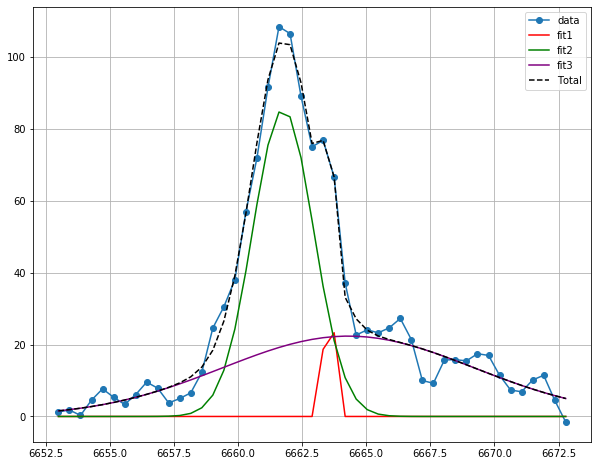

In [44]:
best = min(Results.keys())
print(best)
best_fit = Results[best]
print(best_fit)

col = ['red','green','purple','blue']

plt.figure(figsize=(10,8))
plt.plot(X,Y, '-o',label="data")

# Separar parametros de gaussianas y nivel cero

#zerol = best_fit[-1]
#print("zerol: ", zerol)
#best_fit = best_fit[:-1]

for i, g in enumerate(np.split(np.array(best_fit),N)):
    plt.plot(X, fit_gauss(X,g), label=f'fit{i+1}', color=col[i])
    
# total:
model_tot = plot_total(best_fit,X,N)
plt.plot(X, model_tot, color = 'k', ls='--', label='Total')
plot_total(best_fit, X, N)
plt.grid(); 
plt.legend()

In [51]:
porcentaje = 0.2
best_results = sorted([i for i in Results.keys()])
best_results = best_results[0:int(len(best_results)*porcentaje)]
best_results;

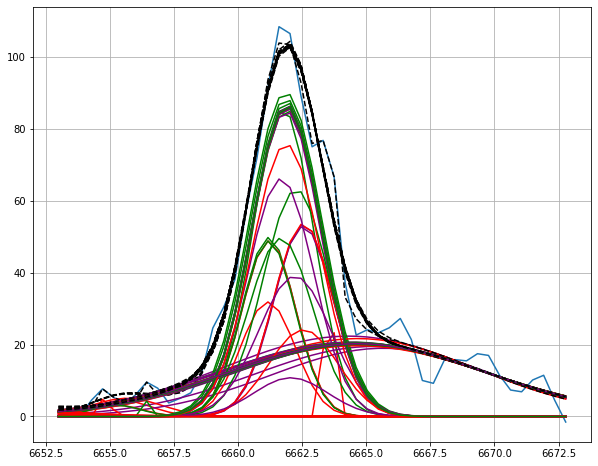

In [52]:
# Todas las mejores %
plt.figure(figsize=(10,8))

plt.plot(X,Y, label="data")

for k in best_results:
    best_fit = Results[k]
    for i, g in enumerate(np.split(np.array(best_fit),N)):
        plt.plot(X, fit_gauss(X,g), label=f'fit{i+1}', color=col[i])
    
    # total:
    model_tot = plot_total(best_fit,X,N)

    plt.plot(X, model_tot, color = 'k', ls='--', label='Total')
plot_total(best_fit, X, N)
plt.grid(); 
# plt.legend()

In [53]:
amplitudes =[Results[i][0] for i in best_results]
medias =[Results[i][1] for i in best_results]
dispersiones =[Results[i][2] for i in best_results]

(array([18.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([3.10844109e+00, 1.54674121e+11, 3.09348243e+11, 4.64022364e+11,
        6.18696486e+11, 7.73370607e+11, 9.28044729e+11, 1.08271885e+12,
        1.23739297e+12, 1.39206709e+12, 1.54674121e+12]),
 <a list of 10 Patch objects>)

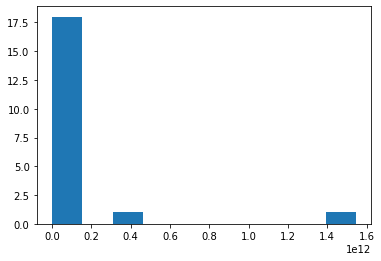

In [54]:
plt.hist(amplitudes)

(array([ 2.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  4., 10.]),
 array([6578.69116503, 6587.28819276, 6595.8852205 , 6604.48224824,
        6613.07927597, 6621.67630371, 6630.27333145, 6638.87035919,
        6647.46738692, 6656.06441466, 6664.6614424 ]),
 <a list of 10 Patch objects>)

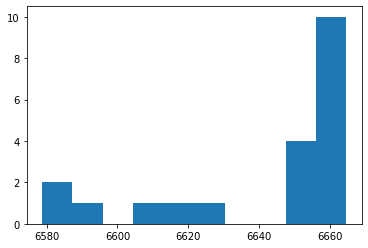

In [55]:
plt.hist(medias)

(array([5., 6., 0., 0., 2., 2., 0., 0., 1., 4.]),
 array([ 0.0847266 ,  1.07625394,  2.06778128,  3.05930862,  4.05083596,
         5.0423633 ,  6.03389064,  7.02541798,  8.01694532,  9.00847266,
        10.        ]),
 <a list of 10 Patch objects>)

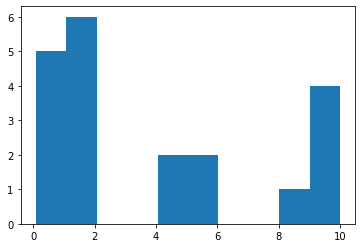

In [56]:
plt.hist(dispersiones)